# Descent Them All

This tutorial is movitated by [Lecture: Optimisation](https://www.youtube.com/watch?v=--NZb480zlg&list=PLLHTzKZzVU9eaEyErdV26ikyolxOsz6mq&index=8)

### Problem $$\text{minimize}_w L(w) = \frac{1}{n} \sum_i l_i(w)$$

### $$ l_i (x_i,y_i,w) $$

### Full Batch Gradient Descent Iterative Update $$ w_{k+1} = w_k - \gamma_k \nabla L(w_k) $$



__Notation:__
1. $l(\cdot,\cdot)$ is assumed to be continuous and differentiable and computes the inccurred loss on a data point.
2. $w_{k+1}$  is the updated value after the k-th iteration,
3. $w_k$ is the initial parameter 
4. $\gamma_k$ is the learnin rate at time $k$
5. $\nabla f(w_k)$ is the gradient of $L$ w.r.t. $w$


The direction of the negative gradient of $L$ w.r.t. $w$ indicates the local steepest direction to the minimum of $L$. The $\gamma$ parameters is the update paramters.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_regression 
from mpl_toolkits.mplot3d import Axes3D
import time

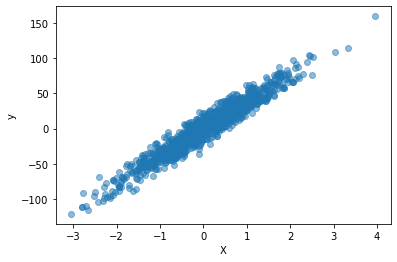

In [2]:
%matplotlib inline
X, y = make_regression(n_samples = 1000, 
                       n_features=1, 
                       #n_informative=1, 
                       noise=10,
                       random_state=1)
plt.plot(X,y, 'o', alpha=0.5)
plt.xlabel('X'),plt.ylabel('y');

In [3]:
# standard computation in regression problem
def predict(X,w):
    return X@w
def residual_error(y,y_hat):
    return y-y_hat
def L(residual_error):
    return np.mean(residual_error**2)
def dLdw(residual_error,X):
    return (residual_error[:, None].T @ X).T/len(X)

In [4]:
# Global params
lr=.01 # learning rate gamma in the formula
num_update=100 # How many times weights are updated
batch_size= int(len(X)*.1) # number of data points used at weight update

In [5]:
%matplotlib notebook
def visualize(Xaug,y,all_losses,all_weights,title):
    # Create meshgrid of weights
    W1, W2 = np.meshgrid(np.linspace(- 50 , 50, 20), 
                       np.linspace(- 50 ,  50  , 20))
    # Create loss_surface
    C = np.array([[L(residual_error(y, predict(Xaug, _)))] for _ in zip(np.ravel(W1), np.ravel(W2))]).reshape(W1.shape)
    W1.shape,W2.shape, C.shape
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W1, W2, C,rstride=1, cstride=1, color='b', alpha=0.2)
    ax.set_xlabel('w_1', labelpad=30, fontweight='bold')
    ax.set_ylabel('w_2', labelpad=30, fontweight='bold')
    ax.set_zlabel('Loss', labelpad=30, fontweight='bold')
    ax.view_init(elev=10., azim=20)
    ax.plot(all_weights[:,0], all_weights[:,1], all_losses, markeredgecolor='r', marker='.')
    ax.set_title(title)
    plt.show()

# Full Gradient Descent

Full GD with 100 updates took 0.01 seconds  to reach final loss:1351.676


<IPython.core.display.Javascript object>


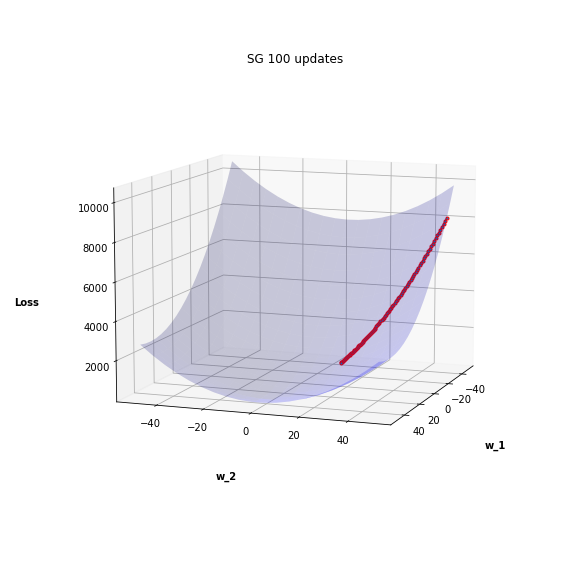

In [6]:
def full_gradient_descent(Xaug,w,num_update,lr):
    start_time=time.time()
    all_losses=[]
    all_weights=[]
    all_predicitons= []
    for i in range(num_update):
        # 1. Compute predicitons of shape N
        pred=predict(Xaug,w).flatten()
        # 2. Compute residual errors of shape N
        error=residual_error(pred,y)
        # 3. Compute loss; mean squared of residual errors.
        loss = L(error)# scalar
        # 4. Compute gradient of te loss w.r.t. weights. # shape d
        dw = dLdw(error,Xaug)
        # 5. Store data.
        all_losses.append(loss)
        all_predicitons.append(pred)
        all_weights.append(w.flatten())
        # 6. Update weights in the direction of the negative gradient. 
        w -= lr * dw
    print(f'Full GD with {num_update} updates took {time.time()- start_time:.2f} seconds  to reach final loss:{loss:.3f}',)
    return np.array(all_losses),np.array(all_weights)
# (1) Augment input data by insertin a column of 1 to include the bias term.
Xaug=np.column_stack( (X,np.ones(X.shape)))
# (2) Initialize weights.
weights=np.array([[-40.],[50.]])# or randomly np.random.randn(Xaug.ndim)[:, None]
all_losses,all_weights = full_gradient_descent(Xaug,weights,num_update=num_update,lr=lr)
visualize(Xaug,y,all_losses,all_weights,f'SG {num_update} updates')

# Stochastic Gradient Descent
### Stochastic  Gradient Descent Iterative Update $$ w_{k+1} = w_k - \gamma_k \nabla l_i (w_k) $$

where $i$ choosen uniformly at random. 

#### Recall that  $L (w_k)$ denotes the average incurred loss on all data ponts given $w_k$, wherase $l_i (w_k)$ denotes an incurred loss on $i$.th data point given $w_k$.

### In Stoachastic Gradient Descent, we compute the gradient of the loss incurred on randomly sampled data points w.r.t. $w$


$$ \mathbb E [ \nabla l_i (w_k)] = \nabla L(w_k)$$


$$ \mathbb E [ w_{k+1})] = w_k - \nabla_k L(w_k)$$


[It is useful to think of SGD as GD with noise](https://www.youtube.com/watch?v=--NZb480zlg&list=PLLHTzKZzVU9eaEyErdV26ikyolxOsz6mq&index=8)

********************
SGD with 100 updates took 0.01 seconds  to reach final loss:1396.420
********************


<IPython.core.display.Javascript object>


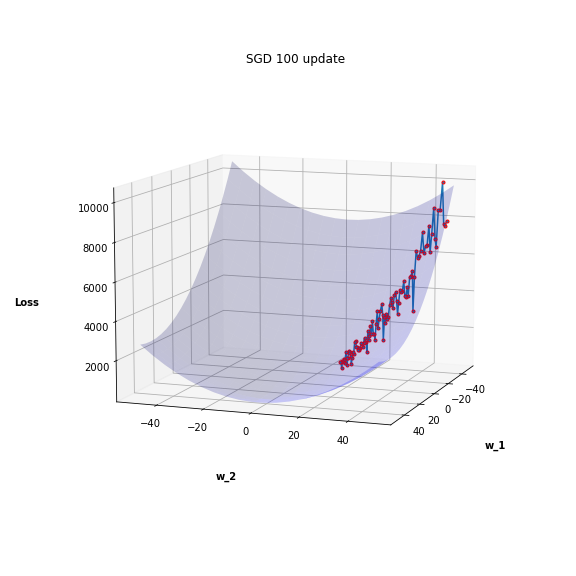

In [7]:
def stoachastic_gradient_descent(Xaug,w,batch_size,num_update,lr):
    start_time=time.time()
    all_losses=[]
    all_weights=[]
    all_predicitons= []
    N=len(Xaug)
    for i in range(num_update):
        # 1. Select random samples
        idx=np.random.randint(N, size=batch_size)
            
        # 1. Compute predicitons of shape N
        pred=predict(Xaug[idx],w).flatten()
        # 2. Compute residual errors of shape N
        error=residual_error(pred,y[idx])
        # 3. Compute loss; mean squared of residual errors.
        loss = L(error)# scalar
        # 4. Compute gradient of te loss w.r.t. weights. # shape d
        dw = dLdw(error,Xaug[idx])
        # 5. Store data.
        all_losses.append(loss)
        all_predicitons.append(pred)
        all_weights.append(w.flatten())
        # 6. Update weights in the direction of the negative gradient. 
        w -= lr * dw
    print('**'*10)
    print(f'SGD with {num_update} updates took {time.time()- start_time:.2f} seconds  to reach final loss:{loss:.3f}',)
    print('**'*10)
    return np.array(all_losses),np.array(all_weights)
# Augment input data for bias term
Xaug=np.column_stack( (X,np.ones(X.shape)))
weights=np.array([[-40.],[50.]])# or randomly np.random.randn(Xaug.ndim)[:, None]
all_losses,all_weights = stoachastic_gradient_descent(Xaug,weights,batch_size=batch_size,num_update=num_update,lr=lr)
visualize(Xaug,y,all_losses,all_weights,title=f'SGD {num_update} update')

# Momentum


### SGD + Momentum $\approx$ Stochastic heavy ball method


### $$ p_{k+1} = \beta_k p_k + \nabla l_i(w_k) \\ w_{k+1} = w_k - \gamma_k p_{k+1}$$

### $$ w_{k+1} = w_k - \gamma_k \nabla l_i (w_k) + \beta_k (w_k -w_{k-1}) $$


$0 \le \beta_k < 1 $

In [8]:
mu=.5 # parameter for momentum.

********************
Momentum with 100 updates took 0.01 seconds to reach final loss:289.728
********************


<IPython.core.display.Javascript object>


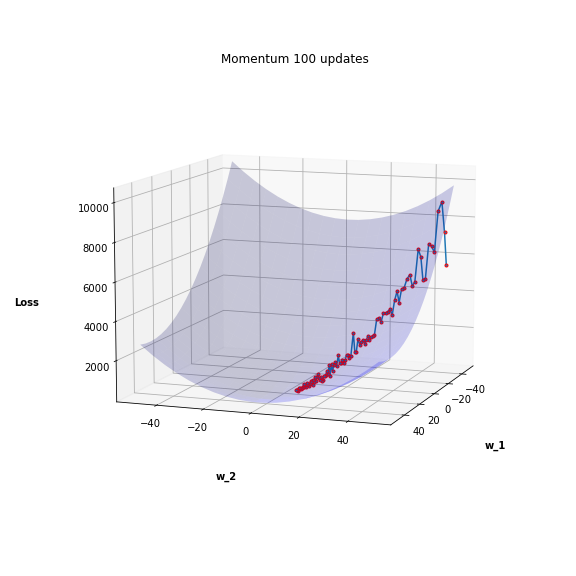

In [9]:
np.random.seed(0)
def momentum(Xaug,w,batch_size,num_update,lr,mu):
    start_time=time.time()
    all_losses=[]
    all_weights=[]
    all_predicitons= []
    v=np.zeros(w.shape)
    N=len(Xaug)

    for i in range(num_update):
        # 1. Select random samples
        idx=np.random.randint(N, size=batch_size)
        # 2. Compute predicitons of shape N
        pred=predict(Xaug[idx],w).flatten()
        # 2. Compute residual errors of shape N
        error=residual_error(pred,y[idx])
        # 3. Compute loss; mean squared of residual errors.
        loss = L(error)# scalar
        # 4. Compute gradient of te loss w.r.t. weights. # shape d
        dw = dLdw(error,Xaug[idx])
        # 5. Store data.
        all_losses.append(loss);all_predicitons.append(pred);all_weights.append(w.flatten())
        # 6. Compute GD update
        w-=lr *dw
        # 6.1. Integrate Momentum
        w+= mu * v - lr *dw 
    print('**'*10)
    print(f'Momentum with {num_update} updates took {time.time()- start_time:.2f} seconds to reach final loss:{loss:.3f}')
    print('**'*10)
    return np.array(all_losses),np.array(all_weights)

# Augment input data for bias term
Xaug=np.column_stack( (X,np.ones(X.shape)))
weights=np.array([[-40.],[50.]])# or randomly np.random.randn(Xaug.ndim)[:, None]
all_losses,all_weights = momentum(Xaug,weights,batch_size=batch_size,num_update=num_update,lr=lr,mu=mu)
visualize(Xaug,y,all_losses,all_weights,title=f'Momentum {num_update} updates')

# Nesterov's Momentum




### $$ p_{k+1} = \beta_k p_k + \nabla l_i(w_k) \\ w_{k+1} = w_k - \gamma_k \big( \nabla l_i(w_k) + \beta p_{k+1} \big) $$



********************
Nesterov Momentum with 100 updates took 0.01 seconds to reach final loss:286.751
********************


<IPython.core.display.Javascript object>


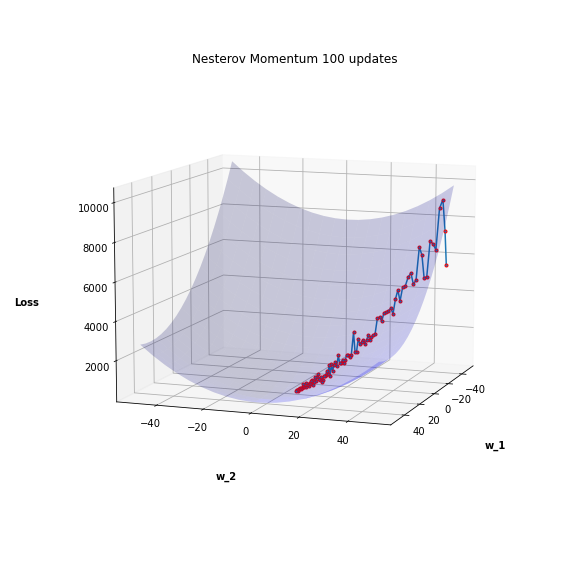

In [10]:
np.random.seed(0)
def nesterov_momentum(Xaug,w,batch_size,num_update,lr,mu):
    start_time=time.time()
    all_losses=[]
    all_weights=[]
    all_predicitons= []
    v=np.zeros(w.shape)
    N=len(Xaug)

    for i in range(num_update):
        # 1. Select random samples
        idx=np.random.randint(N, size=batch_size)
        # 2. Compute predicitons of shape N
        pred=predict(Xaug[idx],w).flatten()
        # 2. Compute residual errors of shape N
        error=residual_error(pred,y[idx])
        # 3. Compute loss; mean squared of residual errors.
        loss = L(error)# scalar
        # 4. Compute gradient of te loss w.r.t. weights. # shape d
        dw = dLdw(error,Xaug[idx])
        # 5. Store data.
        all_losses.append(loss);all_predicitons.append(pred);all_weights.append(w.flatten())
        # 6. Compute Momentum
        v = mu*v+dw
        # 6.1. Integrate Nesterov's Momentum
        w-= lr * (dw + mu *v) 
    print('**'*10)
    print(f'Nesterov Momentum with {num_update} updates took {time.time()- start_time:.2f} seconds to reach final loss:{loss:.3f}')
    print('**'*10)
    return np.array(all_losses),np.array(all_weights)

# Augment input data for bias term
Xaug=np.column_stack( (X,np.ones(X.shape)))
weights=np.array([[-40.],[50.]])# or randomly np.random.randn(Xaug.ndim)[:, None]
all_losses,all_weights = nesterov_momentum(Xaug,weights,batch_size=batch_size,num_update=num_update,lr=lr,mu=mu)
visualize(Xaug,y,all_losses,all_weights,title=f'Nesterov Momentum {num_update} updates')

### Congrats go to the Optim API if you are interested in implementing these algorithms in a more software development oriented stye